In [1]:
from sklearn.datasets import load_iris
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=load_iris()
X = data.data
y = data.target

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
features=data.feature_names
print(features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<Axes: >

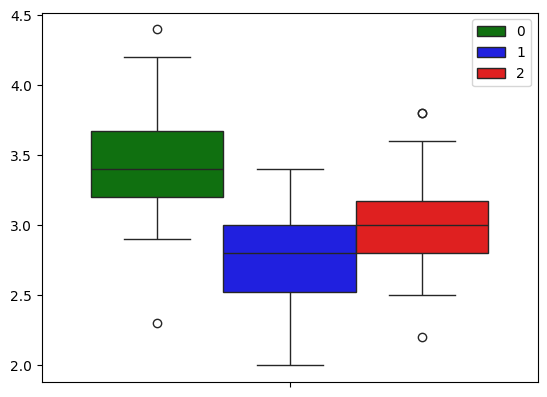

In [6]:
my_pal = {0:"g", 1:"b",2:"r"}
sns.boxplot(hue=y,y=X[:,1],palette=my_pal,legend=True)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [9]:
model=RandomForestClassifier()

In [10]:
rf_model=model.fit(X_train,y_train)

In [11]:
print(rf_model.score(X_test,y_test))

0.9736842105263158


In [12]:
predictions=rf_model.predict(X_test)
print(predictions)

[2 1 2 2 1 1 1 1 2 2 2 1 2 1 0 2 1 2 1 1 1 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 2
 1]


In [13]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
def classify(predictions):
    if predictions<0.5:
        return 'Setosa'
    elif predictions <1.5:
        return 'Versicolor'
    else:
        return 'Virginica'

In [15]:
import gradio as gr
import numpy as np
def predict_flower(sl,sw,pl,pw):
    input_array=np.array([[sl,sw,pl,pw]])
    pred=rf_model.predict(input_array)
    output=classify(pred[0])
    if output=='Setosa':
      return [(0,output)]
    elif output=='Versicolor':
      return [(1,output)]
    else:
      return [(2,output)]


In [16]:
sl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Sepal Length")
sw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Sepal Width")
pl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Petal Length")
pw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Petal Width")
op=gr.outputs.HighlightedText(color_map={ "Setosa": "lightgreen",
        "Versicolor": "pink",
        "Virginica": "yellow",})

demo = gr.Interface(fn = predict_flower, 
             inputs=[sl,sw,pl,pw], 
             outputs=op,
             live=True,
             examples=[[1,2,3,4]])


demo.launch()

/home/cristian/Desktop/gradio_0.30/.venv/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


IMPORTANT: You are using gradio version 3.0, however version 3.14.0 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f4edb1ebfa0>, 'http://127.0.0.1:7860/', None)

In [17]:
help(gr.Interface)

Help on class Interface in module gradio.interface:

class Interface(gradio.blocks.Blocks)
 |  Interface(fn: 'Callable | List[Callable]', inputs: 'Optional[str | Component | List[str | Component]]', outputs: 'Optional[str | Component | List[str | Component]]', examples: 'Optional[List[Any] | List[List[Any]] | str]' = None, cache_examples: 'Optional[bool]' = None, examples_per_page: 'int' = 10, live: 'bool' = False, interpretation: 'Optional[Callable | str]' = None, num_shap: 'float' = 2.0, title: 'Optional[str]' = None, description: 'Optional[str]' = None, article: 'Optional[str]' = None, thumbnail: 'Optional[str]' = None, theme: 'Optional[str]' = None, css: 'Optional[str]' = None, allow_flagging: 'Optional[str]' = None, flagging_options: 'List[str]' = None, flagging_dir: 'str' = 'flagged', flagging_callback: 'FlaggingCallback' = <gradio.flagging.CSVLogger object at 0x7f4ed85602b0>, analytics_enabled: 'Optional[bool]' = None, _repeat_outputs_per_model: 'bool' = True, **kwargs)
 |  
 | 